In [1]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import random,shutil

from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data = "/content/drive/MyDrive/Colab Notebooks/Driver's_Drowsiness_Detection_Collab/data/train/"
test_data = "/content/drive/MyDrive/Colab Notebooks/Driver's_Drowsiness_Detection_Collab/data/test/"

In [4]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(140,140),class_mode='categorical' ):
    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [5]:
BS= 32
TS=(24,24)
train_batch= generator(train_data,shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator(test_data,shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6


In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [8]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',
                                                        verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                    monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_batch, validation_data=valid_batch,epochs=50,steps_per_epoch=SPE ,validation_steps=VS, callbacks=callbacks)

Epoch 1/50
36/38 [===========================>..] - ETA: 0s - loss: 0.4787 - accuracy: 0.7583
Epoch 1: val_accuracy improved from -inf to 0.91667, saving model to checkpoint/
38/38 [==============================] - 17s 277ms/step - loss: 0.4679 - accuracy: 0.7654 - val_loss: 0.2049 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.8952
Epoch 2: val_accuracy improved from 0.91667 to 0.94792, saving model to checkpoint/
38/38 [==============================] - 4s 114ms/step - loss: 0.2812 - accuracy: 0.8952 - val_loss: 0.1548 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9393
Epoch 3: val_accuracy did not improve from 0.94792
38/38 [==============================] - 5s 119ms/step - loss: 0.1622 - accuracy: 0.9393 - val_loss: 0.1331 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/50
38/38 [==============================] - ETA: 0s - loss: 0

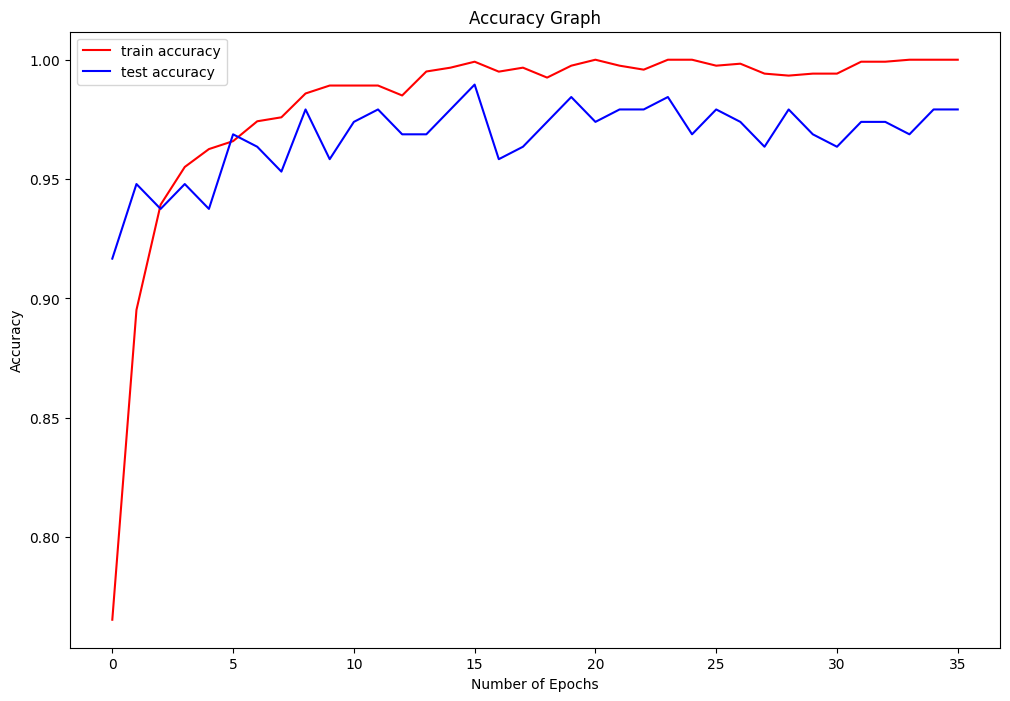

In [11]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],'r',label='train accuracy')
plt.plot(history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

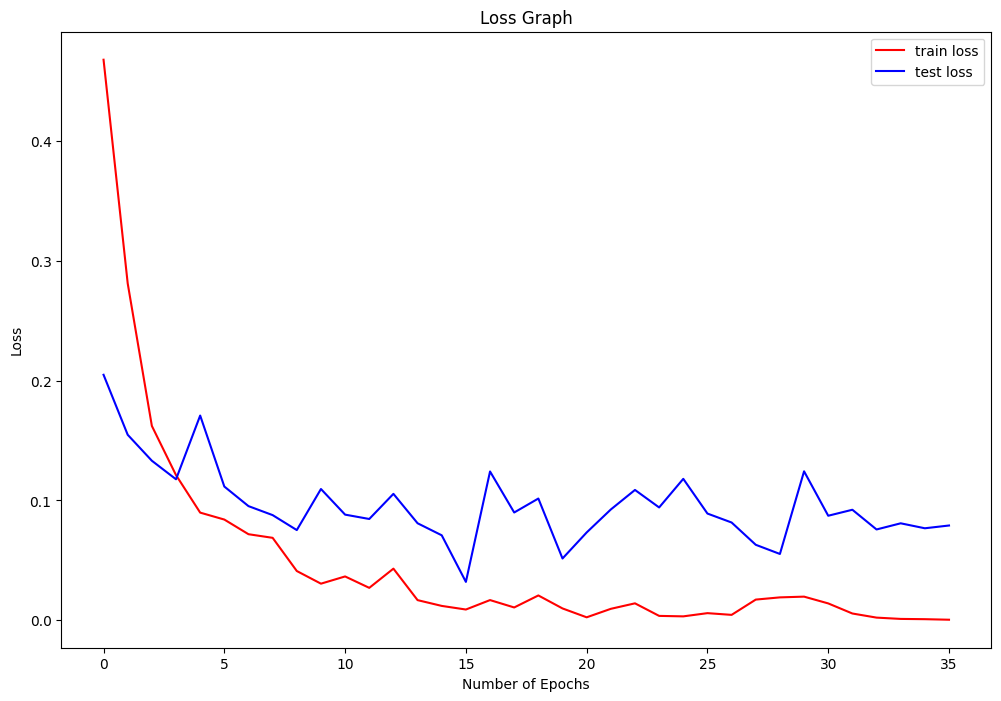

In [12]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()

In [15]:
y_preds = model.predict(valid_batch)
print(y_preds)

7/7 [==============================] - 1s 138ms/step
[[1.00000000e+00 7.51973650e-10]
 [9.28061013e-13 1.00000000e+00]
 [9.44338274e-10 1.00000000e+00]
 [9.99999523e-01 5.14837552e-07]
 [3.12878541e-07 9.99999642e-01]
 [9.99977231e-01 2.27130386e-05]
 [9.99999642e-01 3.57885654e-07]
 [9.99986768e-01 1.32260147e-05]
 [3.07947019e-08 1.00000000e+00]
 [9.99879599e-01 1.20328048e-04]
 [2.90248008e-03 9.97097492e-01]
 [9.99999881e-01 1.27214292e-07]
 [1.00000000e+00 1.39886810e-10]
 [9.99556720e-01 4.43311204e-04]
 [5.78883958e-15 1.00000000e+00]
 [9.99998212e-01 1.79001813e-06]
 [9.99999762e-01 2.58357460e-07]
 [5.17753477e-04 9.99482274e-01]
 [9.99977708e-01 2.22719755e-05]
 [1.40429995e-06 9.99998569e-01]
 [2.57015720e-09 1.00000000e+00]
 [8.18767365e-09 1.00000000e+00]
 [3.13331559e-02 9.68666792e-01]
 [5.74577825e-06 9.99994278e-01]
 [9.99844432e-01 1.55529080e-04]
 [8.42433497e-26 1.00000000e+00]
 [8.20321441e-02 9.17967856e-01]
 [8.61005390e-07 9.99999166e-01]
 [7.44357333e-03 9.9255

In [17]:
res = model.evaluate(valid_batch)
print(res)

7/7 [==============================] - 1s 87ms/step - loss: 0.0576 - accuracy: 0.9817
[0.05755609646439552, 0.9816513657569885]


In [18]:
max_indices = np.argmax(y_preds, axis=1)

# Create a one-hot encoding matrix
one_hot_matrix = np.zeros(y_preds.shape)
one_hot_matrix[np.arange(len(max_indices)), max_indices] = 1

print(one_hot_matrix)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

In [21]:
model.save("cnnCat.keras")